<a href="https://colab.research.google.com/github/GitMechub/Rocket-Nozzle_Sizing/blob/main/Rocket_Nozzle_Sizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rocket Nozzle Sizing - v1.0.0**

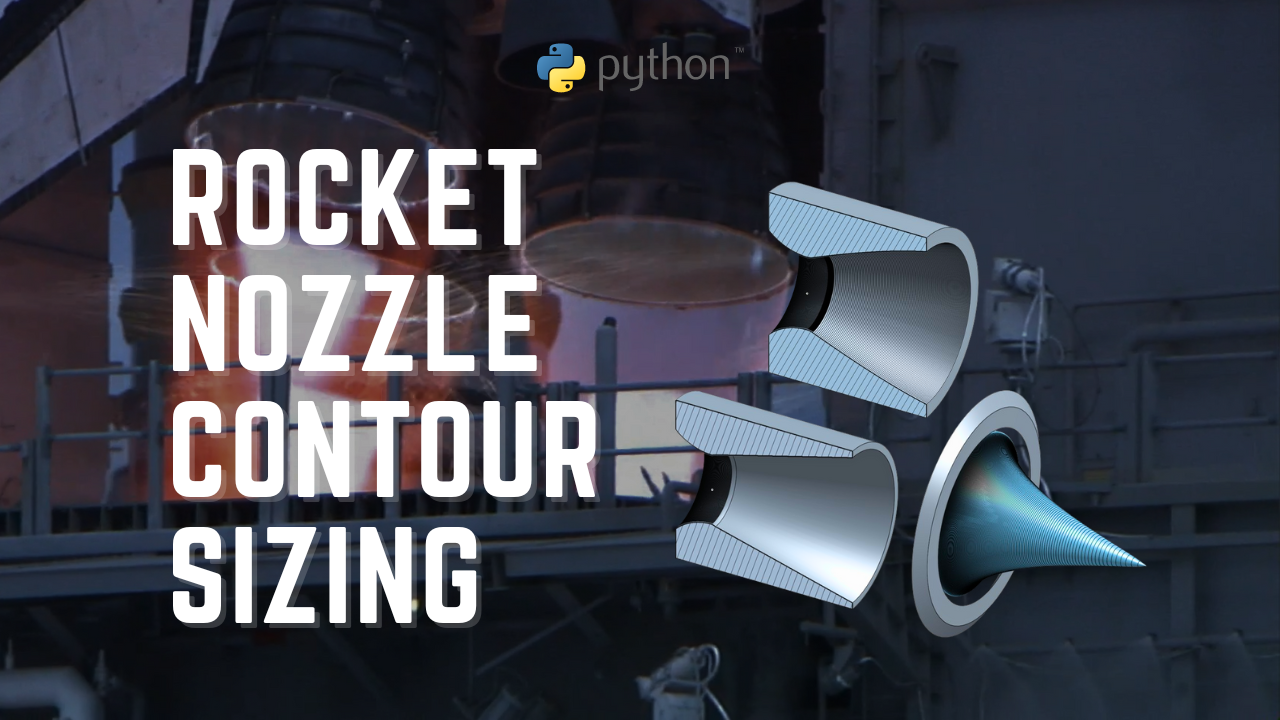

Please, subscribe to the channel [Mechub](https://youtube.com/@Mechub?sub_confirmation=1)
and check my [GitHub](https://github.com/GitMechub)

---

*Por favor, inscreva-se no canal: [Mechub](https://youtube.com/@Mechub?sub_confirmation=1) e visite o meu [GitHub](https://github.com/GitMechub)*


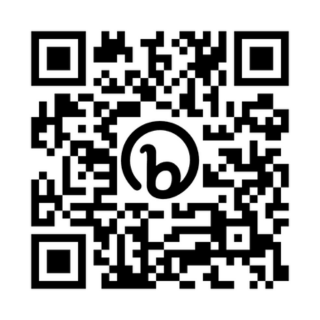

Link for the video explaining how to use the code:

---

*Link para o vídeo explicando como usar o código (legendas em potuguês):*

[![YouTube](https://img.shields.io/badge/YouTube-FF0000?style=for-the-badge&logo=youtube&logoColor=white)](https://youtu.be/Crxc9OeuSTg)

# PACKS

In [ ]:
pip install rocketcea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.5/38.5 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rocketcea: filename=rocketcea-1.1.34-cp310-cp310-linux_x86_64.whl size=5294378 sha256=92c865b23f9d3006d4877cf46c79d45583dfe3e330077dc554bd634ee30b7f6a
  Stored in directory: /root/.cache/pip/wheels/0a/c6/78/09f751e0e6185bac68940ca41d7ce5038ccd506209a8339781
Successfully built rocketcea


In [ ]:
from rocketcea.cea_obj import add_new_fuel, add_new_oxidizer
from rocketcea.cea_obj_w_units import CEA_Obj

from pylab import *


In [ ]:
import numpy as np

import pandas as pd

import math
from math import sin

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
import os

def clear_terminal():
    os.system('cls' if os.name == 'nt' else 'clear')

## CUSTOM PROPELLANTS

In [ ]:
# Adding new propellants (CEA NASA):

##  Adicionando Parafina e N2O no CEA:

custom_options = []


card_str = """
fuel C20H42(S)  C 20.0   H 42.0    wt%=100.00
h,cal=-142242.1     t(k)=298.15   rho=788.6
"""
p_name = 'Paraffin'
add_new_fuel(p_name, card_str)
custom_options.append(p_name)


card_str = """
oxid NitrousOxide  N 2.0 O 1.0  wt%=100.00
h,cal= 19467.0 t(k)=298.15
"""
p_name = 'N2O_custom'
add_new_oxidizer(p_name, card_str)
custom_options.append(p_name)

###


## FUNCTIONS

In [ ]:
# Last not null/empty list value

def last_valid(lst):
    return next((x for x in reversed(lst) if x and not isnan(x)), None) # or 'null'
#

In [ ]:
# Get user choice function:

def get_user_choice(prompt, options):
    while True:
        print(prompt)
        for i, option in enumerate(options):
            print(f"[{i + 1}] {option}")

        try:
            choice = int(input("Enter the number of your choice: "))
            if 1 <= choice <= len(options):
                print('\n---\n')
                return options[choice - 1]
            else:
                print("\n*** Invalid choice. Please select a valid option. ***\n")
        except ValueError:
            print("\n*** Invalid input. Please enter the number of your choice. ***\n")

#

In [ ]:
# Propellant options:

def select_fuel():
    options =  ['A50', 'Acetylene', 'AL', 'AP', 'B2H6', 'C2H2', 'C2H5OH', 'C2H6', 'C2H6_167', 'C3H8', 'CFx', 'CH3OH', 'CH4', 'CINCH', 'DMAZ', 'ECP_dimer', 'Ethanol', 'Gasoline', 'GCH4', 'GH2', 'GH2_160', 'H2', 'H2O', 'HTPB', 'Isopropanol', 'JetA', 'JP10', 'JP4', 'JPX', 'Kerosene', 'Kerosene90_H2O10', 'LCH4_NASA', 'LH2', 'M20', 'M20_NH3', 'Methanol', 'MHF3', 'MMH', 'N2H4', 'NH3', 'NITROMETHANE', 'Propane', 'Propylene', 'RP1', 'UDMH']
    print("* SELECT THE FUEL:\n")
    for i in range(len(options)):
        print(f"[ {i + 1} ] {options[i]}")

    fuel_choice = int(input("\n")) - 1
    fuel = options[fuel_choice]
    clear_terminal()
    print('-> ',fuel,'\n\n---\n\n')
    return fuel


def select_oxidizer():
  options = ['90_H2O2', '98_H2O2', 'AIR', 'AIRSIMP', 'CLF3', 'CLF5', 'F2', 'GO2', 'H2O', 'H202', 'HAN315', 'HNO3', 'IRFNA', 'LO2', 'MON15', 'MON25', 'MON3', 'N2F4', 'N2H4', 'N2O', 'N2O3', 'N2O4', 'N2O_nbp', 'O2', 'OF2', 'Peroxide90', 'Peroxide98']
  print("* SELECT THE OXIDIZER:\n")
  for i in range(len(options)):
      print(f"[ {i + 1} ] {options[i]}")

  oxidizer_choice = int(input("\n")) - 1
  oxidizer = options[oxidizer_choice]
  clear_terminal()
  print('-> ',oxidizer,'\n\n---\n\n')
  return oxidizer


def solidormonopropellant():
    options = ['AMT_2091', 'AP10_RDX25_HTPB', 'ARC311', 'ARC448', 'ARC452', 'ARC457', 'HAN269', 'HAN315', 'HPB24']
    print("* SELECT THE MONO OR SOLID PROPELLANT:\n")
    for i in range(len(options)):
        print(f"[ {i + 1} ] {options[i]}")

    propellant_choice = int(input("\n")) - 1
    propellant = options[propellant_choice]
    clear_terminal()
    print('-> ',propellant,'\n\n---\n\n')
    return propellant


def custompropellant(custom_options):
    options = custom_options
    print("* SELECT THE CUSTOM PROPELLANT:\n")
    for i in range(len(options)):
        print(f"[ {i + 1} ] {options[i]}")

    propellant_choice = int(input("\n")) - 1
    propellant = options[propellant_choice]
    clear_terminal()
    print('-> ',propellant,'\n\n---\n\n')
    return propellant

#


In [ ]:
# Propellant selection function:

def selecting_propellants():
    is_bipropellant = get_user_choice("* Is the propellant bipropellant?\n", ["Yes", "No"]) == "Yes"

    if is_bipropellant:
        is_custom_fuel = get_user_choice("* Fuel option\n", ["Regular", "Custom"]) == "Custom"

        if is_custom_fuel:
            fuel = custompropellant(custom_options)
        else:
            fuel = select_fuel()

        is_custom_oxidizer = get_user_choice("* Oxidizer option\n", ["Regular", "Custom"]) == "Custom"

        if is_custom_oxidizer:
            oxidizer = custompropellant(custom_options)
        else:
            oxidizer = select_oxidizer()

        return fuel, oxidizer,2

    else:
        is_custom_propellant = get_user_choice("* Propellant option\n", ["Regular", "Custom"]) == "Custom"

        if is_custom_propellant:
            propellant = custompropellant(custom_options)
            fuel, oxidizer = propellant, propellant
        else:
            propellant = solidormonopropellant()
            fuel, oxidizer = propellant, propellant

    return fuel, oxidizer,1

#


# Creating CEA_Obj function:

def select_and_create_CEA_Obj():
    from rocketcea.cea_obj_w_units import CEA_Obj
    F_name, O_name, prop_num = selecting_propellants()

    if prop_num == 2:
        print(f"Selected Fuel: {F_name}")
        print(f"Selected Oxidizer: {O_name}")
        print('\n\n---\n\n')
        Prop = CEA_Obj(oxName=O_name, fuelName=F_name, pressure_units='Pa', cstar_units='m/s', density_units='g/cc', temperature_units='K')

        from rocketcea.cea_obj import CEA_Obj
        ispObj = CEA_Obj( oxName=O_name, fuelName=F_name )

    else:
        print(f"Selected Propellant: {F_name}")
        print('\n\n---\n\n')
        Prop = CEA_Obj(propName=F_name, pressure_units='Pa', cstar_units='m/s', density_units='g/cc', temperature_units='K')

        from rocketcea.cea_obj import CEA_Obj
        ispObj = CEA_Obj( propName=F_name )


    return Prop, ispObj

#



In [ ]:
def calculate_initial_parameters(Prop, P_1, OF, P_3, F):

    # Calculated Parameters:

    eps = Prop.get_eps_at_PcOvPe(Pc=P_1, MR=OF, PcOvPe=P_1/101325, frozen=1, frozenAtThroat=1)  # Nozzle Expansion Area Ratio
    c_star = Prop.get_Cstar(Pc=P_1, MR=OF)  # Initial C* (m/s)
    c_f, _, __ = Prop.getFrozen_PambCf(Pamb=P_3, Pc=P_1, MR=OF, eps=eps, frozenAtThroat=1)  # Initial thrust coefficient
    mw, gamma = Prop.get_Chamber_MolWt_gamma(Pc=P_1, MR=OF, eps=eps)  # Molar mass (g/mol) and gamma: specific heat ratio
    R = 8314 / mw  # Gas constant for the propellant: Ru/MM
    T_1 = Prop.get_Tcomb(Pc=P_1, MR=OF)  # Adiabatic flame temperature - Combustion temperature (K)
    mach = Prop.get_MachNumber(Pc=P_1, MR=OF, eps=eps, frozen=0, frozenAtThroat=0) # Return nozzle exit mach number

    #


    # Calculation of mass flow rates:

    A_t = (F) / (P_1 * c_f)  # Throat area of the nozzle (m²)
    m_total = (F) / (c_star * c_f)  # Initial total propellant mass flow rate (kg/s)
    m_f = m_total / (OF + 1)  # Initial fuel mass flow rate (kg/s)
    m_ox = m_total - m_f  # Initial oxidizer mass flow rate (kg/s)
    A_2 = A_t*eps   # Exit area of the nozzle (m²)

    R_2 = (A_2/math.pi)**0.5    # Exit radius (m)
    R_t = (A_t/math.pi)**0.5    # Throat radius (m)

    #


    initial_parameters = {
        "eps": eps,
        "c_star": c_star,
        "c_f": c_f,
        "mw": mw,
        "gamma": gamma,
        "R": R,
        "T_1": T_1,
        "A_t": A_t,
        "R_t": R_t,
        "R_2": R_2,
        "A_2": A_2,
        "m_total": m_total,
        "m_f": m_f,
        "m_ox": m_ox,
        "mach_2": mach
    }

    return initial_parameters


# INPUT

To run: **Ctrl+F9** (Google Colab)

In [ ]:
# Setup:

P_1 = 30e5    # Chamber pressure in Pa
P_3 = 101325    # Ambient pressure in Pa
F = 1750    # Desired thrust in Newtons
OF = 7.6    # Oxidizer/Fuel ratio

Method = 1   # Spike nozzle contour method (1 or 2) -> 1: [6][7] Method | 2: [8][9] Method
spike_detail = False    # For a more refined spike nozzle contour curve, set the variable to True

#

## PROPELLANT SELECTION

In [ ]:
# Propellant selection

Prop, ispObj = select_and_create_CEA_Obj()

#

* Is the propellant bipropellant?

[1] Yes
[2] No
Enter the number of your choice: 1

---

* Fuel option

[1] Regular
[2] Custom
Enter the number of your choice: 2

---

* SELECT THE CUSTOM PROPELLANT:

[ 1 ] Paraffin
[ 2 ] N2O_custom

1
->  Paraffin 

---


* Oxidizer option

[1] Regular
[2] Custom
Enter the number of your choice: 1

---

* SELECT THE OXIDIZER:

[ 1 ] 90_H2O2
[ 2 ] 98_H2O2
[ 3 ] AIR
[ 4 ] AIRSIMP
[ 5 ] CLF3
[ 6 ] CLF5
[ 7 ] F2
[ 8 ] GO2
[ 9 ] H2O
[ 10 ] H202
[ 11 ] HAN315
[ 12 ] HNO3
[ 13 ] IRFNA
[ 14 ] LO2
[ 15 ] MON15
[ 16 ] MON25
[ 17 ] MON3
[ 18 ] N2F4
[ 19 ] N2H4
[ 20 ] N2O
[ 21 ] N2O3
[ 22 ] N2O4
[ 23 ] N2O_nbp
[ 24 ] O2
[ 25 ] OF2
[ 26 ] Peroxide90
[ 27 ] Peroxide98

20
->  N2O 

---


Selected Fuel: Paraffin
Selected Oxidizer: N2O


---




# CODE

In [ ]:
initial_params = calculate_initial_parameters(Prop, P_1, OF, P_3, F)
initial_params

{'eps': 4.410926031992679,
 'c_star': 1613.3817590575693,
 'c_f': 1.442837303647651,
 'mw': 25.96171179013873,
 'gamma': 1.1505642975235266,
 'R': 320.24082491964117,
 'T_1': 3315.343930145826,
 'A_t': 0.00040429598809138263,
 'R_t': 0.011344223638219197,
 'R_2': 0.023825370726593884,
 'A_2': 0.0017833196985024816,
 'm_total': 0.7517674954888772,
 'm_f': 0.0874148250568462,
 'm_ox': 0.6643526704320311,
 'mach_2': 2.6241361523219746}

## CONICAL NOZZLE

In [ ]:
#######################

""" CONICAL NOZZLE """

#######################

def conical_nozzle(initial_params):

  conical = {}
  conical['Throat radius (mm)'] = initial_params["R_t"]*1000
  conical['Exit radius (mm)'] = initial_params["R_2"]*1000
  conical['Divergent Length (mm)'] = 0
  conical['Curve 1 Radius (mm)'] = 0
  conical['Curve 2 Radius (mm)'] = 0


  # Throat circular arc

  ## Entrance throat circular arc (Curve 1) [3][1]
  theta1 = np.linspace(-135, -90, num=100)  # Values of theta from -135 to -90
  x1c = 1.5 * conical['Throat radius (mm)'] * np.cos(np.radians(theta1))
  y1c = 1.5 * conical['Throat radius (mm)'] * np.sin(np.radians(theta1)) + 1.5 * conical['Throat radius (mm)'] + conical['Throat radius (mm)']
  initial_params['L_c'] = x1c[-1] # Convergent length (mm)
  conical['Curve 1 Radius (mm)'] = 1.5*conical['Throat radius (mm)']

  x1_start = x1c[0]
  x1_end = x1c[-1]
  y1_start = y1c[0]
  y1_end = y1c[-1]


  ## Exit throat circular arc (Curve 2) [3][1]
  theta2 = np.linspace(-90, (15 - 90), num=100)
  x2c = 0.382 * conical['Throat radius (mm)'] * np.cos(np.radians(theta2))
  y2c = 0.382 * conical['Throat radius (mm)'] * np.sin(np.radians(theta2)) + 0.382 * conical['Throat radius (mm)'] + conical['Throat radius (mm)']
  R_n = y2c[-1]
  X_n = x2c[-1]
  conical['Curve 2 Radius (mm)'] = 0.382*conical['Throat radius (mm)']

  x2_start = x2c[0]
  x2_end = x2c[-1]
  y2_start = y2c[0]
  y2_end = y2c[-1]
  print(y2_end)

  ###


  # Divergent section

  ## Divergent section length (15° Conical Nozzle Length) [1]
  L_d = (conical['Exit radius (mm)']-y2_end)/(np.tan(np.radians(15)))

  ## Exit shape
  t = np.linspace(x2_end, L_d, num=100)
  x3c = t
  y3c = (np.tan(np.radians(15)))*t + y2_end-(np.tan(np.radians(15)))*x2_end

  x3_start = x3c[0]
  x3_end = x3c[-1]
  y3_start = y3c[0]
  y3_end = y3c[-1]

  ###


  conical_xy_1 = pd.DataFrame({'x (m)': [item/1000 for item in x1c], 'y (m)': [item/1000 for item in y1c]})
  conical_xy_2 = pd.DataFrame({'x (m)': [item/1000 for item in x2c], 'y (m)': [item/1000 for item in y2c]})
  conical_xy_3 = pd.DataFrame({'x (m)': [item/1000 for item in x3c], 'y (m)': [item/1000 for item in y3c]})


  ###########################

  """ PLOT CONICAL NOZZLE"""

  ###########################

  # Plot Nozzle Chart

  plt.plot(x1c, y1c, label='Curve 1')
  plt.plot(x2c, y2c, label='Curve 2')
  plt.plot(x3c, y3c, label='Curve 3')
  plt.scatter([x1_start, x1_end, x2_start, x2_end, x3_start, x3_end],
              [y1_start, y1_end, y2_start, y2_end, y3_start, y3_end],
              color=['blue', 'blue', 'orange', 'orange', 'green', 'green'],
              label='Start/End Points', s=30)


  plt.xlabel('x (mm)')
  plt.ylabel('y (mm)')
  plt.title('Conical Nozzle')
  plt.legend()
  plt.axhline(y=0, color='black', linestyle='-.', linewidth=1.5)
  plt.axis('equal')
  plt.grid(True)
  plt.show()

  conical['Divergent Length (mm)'] = L_d

  #


  # Coordinates plot

  print('\n')
  coordinates_conical =  {'Coordinate': ['Start (x, y)', 'End (x, y)'],
                          'Curve 1': [(round(x1_start,2),round(y1_start,2)), (round(x1_end,2), round(y1_end,2))],
                          'Curve 2': [(round(x2_start,2),round(y2_start,2)), (round(x2_end,2), round(y2_end,2))],
                          'Curve 3': [(round(x3_start,2),round(y3_start,2)), (round(x3_end,2), round(y3_end,2))]}

  coordinates_conical = pd.DataFrame(coordinates_conical)
  print(coordinates_conical)

  #


  # Table:

  table_conical_dimensions = go.Figure(data=[go.Table(header=dict(values=['Throat radius (mm)','Exit radius (mm)', 'Divergent Length (mm)', 'Curve 1 Radius (mm)', 'Curve 2 Radius (mm)'], height=40, align=['center'], line_color='darkslategray', fill_color='royalblue',font=dict(color='white', size=16)),
                  cells=dict(values=[ round(conical['Throat radius (mm)'],2), round(conical['Exit radius (mm)'],2), round(conical['Divergent Length (mm)'],2), round(conical['Curve 1 Radius (mm)'],2), round(conical['Curve 2 Radius (mm)'],2)], line_color='darkslategray', height = 30, fill_color=['lightcyan'], font=dict(color='darkslategray', size=14) ))
                      ], layout=go.Layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )
                          )

  table_conical_dimensions.update_layout(title='Conical Nozzle Dimensions', titlefont=dict(color='royalblue', size=28), height=500 )

  #

  table_conical_dimensions.show()

  return conical_xy_1, conical_xy_2, conical_xy_3


## BELL-SHAPED NOZZLE

In [ ]:
####################

""" BELL NOZZLE """

####################


def bell_nozzle(initial_params):

  x = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
  y = np.array([23, 26, 27.5, 29, 30, 30.5, 31, 31.5, 32, 32.5])

  bell = {}
  bell['Throat radius (mm)'] = initial_params["R_t"]*1000
  bell['Exit radius (mm)'] = initial_params["R_2"]*1000
  bell['Divergent Length (mm)'] = 0
  bell['Divergent Theta n (°)'] = 0
  bell['Divergent Theta e (°)'] = 0
  bell['Curve 1 Radius (mm)'] = 0
  bell['Curve 2 Radius (mm)'] = 0


  # Parameters obtained from curve fitting [4][3]

  ## theta n
  a = 4.090132978351974
  b = 16.539279319795025

  theta_n = a * np.log(initial_params['eps']) + b


  ## theta e
  a = -2.175213837970657
  b = 15.932404342184924

  theta_e = a * np.log(initial_params['eps']) + b

  ###


  # Throat circular arc

  ## Entrance throat circular arc (Curve 1) [3][5]
  theta1 = np.linspace(-135, -90, num=100)  # Values of theta from -135 to -90
  x1b = 1.5 * bell['Throat radius (mm)'] * np.cos(np.radians(theta1))
  y1b = 1.5 * bell['Throat radius (mm)'] * np.sin(np.radians(theta1)) + 1.5 * bell['Throat radius (mm)'] + bell['Throat radius (mm)']
  initial_params['L_c'] = x1b[-1] # Convergent length (mm)
  bell['Curve 1 Radius (mm)'] = 1.5*bell['Throat radius (mm)']

  x1_start = x1b[0]
  x1_end = x1b[-1]
  y1_start = y1b[0]
  y1_end = y1b[-1]


  ## Exit throat circular arc (Curve 2) [3][5]
  theta2 = np.linspace(-90, (theta_n - 90), num=100)
  x2b = 0.382 * bell['Throat radius (mm)'] * np.cos(np.radians(theta2))
  y2b = 0.382 * bell['Throat radius (mm)'] * np.sin(np.radians(theta2)) + 0.382 * bell['Throat radius (mm)'] + bell['Throat radius (mm)']
  R_n = y2b[-1]
  X_n = x2b[-1]
  bell['Curve 2 Radius (mm)'] = 0.382*bell['Throat radius (mm)']

  x2_start = x2b[0]
  x2_end = x2b[-1]
  y2_start = y2b[0]
  y2_end = y2b[-1]

  ###


  # Divergent section [3][5]

  ## Divergent section length (80% 15° Conical Nozzle Length)
  L_d = 0.8*((((initial_params['eps']**0.5)-1) * bell['Throat radius (mm)'])/(np.tan(np.radians(15))))

  Nx = x2b[-1]
  Ny = y2b[-1]
  Ex = 0.8*((((initial_params["eps"]**0.5)-1) * bell['Throat radius (mm)'])/(np.tan(np.radians(15))))
  Ey = bell['Exit radius (mm)']

  m1 = np.tan(np.radians(theta_n))
  m2 = np.tan(np.radians(theta_e))
  C1 = Ny - (m1*Nx)
  C2 = Ey - (m2*Ex)
  Qx = (C2 - C1)/(m1 - m2)
  Qy = ((C2*m1) - (C1*m2))/(m1 - m2)

  ## Exit circular arc (Curve 3) [3]
  t = np.linspace(0, 1, num=100)
  x3b = (((1-t)**2)*Nx) + (2*(1-t)*t*Qx) + ((t**2)*Ex)
  y3b = (((1-t)**2)*Ny) + (2*(1-t)*t*Qy) + ((t**2)*Ey)

  x3_start = x3b[0]
  x3_end = x3b[-1]
  y3_start = y3b[0]
  y3_end = y3b[-1]

  ###


  """
  # 2nd METHOD: [5]

  a = ((1/np.tan(np.radians(theta_n)))-(1/np.tan(np.radians(theta_e))))/(2*(initial_params["R_t"]-initial_params["R_2"]))
  b = (1/np.tan(np.radians(theta_e)))-(2*a*initial_params["R_2"])

  c = X_n - a*(R_n**2) - b*R_n

  print(f'a: {a}, b: {b}, c: {c}')

  y3b = np.linspace(R_n, initial_params["R_2"], num=100)
  x3b = a * (y3b**2) + b * y3b + c

  x3_start = x3b[0]
  x3_end = x3b[-1]
  y3_start = y3b[0]
  y3_end = y3b[-1]

  # Plot
  plt.plot(x1b, y1b, label='Equation 4')
  plt.plot(x2b, y2b, label='Equation 5')
  plt.plot(x3b, y3b, label='Equation 6')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Curves for Equation 4, 5, and 6')
  plt.legend()
  plt.axis('equal')
  plt.grid(True)
  plt.show()

  #
  """

  bell_xy_1 = pd.DataFrame({'x (m)': [item/1000 for item in x1b], 'y (m)': [item/1000 for item in y1b]})
  bell_xy_2 = pd.DataFrame({'x (m)': [item/1000 for item in x2b], 'y (m)': [item/1000 for item in y2b]})
  bell_xy_3 = pd.DataFrame({'x (m)': [item/1000 for item in x3b], 'y (m)': [item/1000 for item in y3b]})


  #######################

  """ PLOT BELL NOZZLE"""

  #######################

  # Plot Nozzle Chart

  plt.plot(x1b, y1b, label='Curve 1')
  plt.plot(x2b, y2b, label='Curve 2')
  plt.plot(x3b, y3b, label='Curve 3')
  plt.scatter([x1_start, x1_end, x2_start, x2_end, x3_start, x3_end],
              [y1_start, y1_end, y2_start, y2_end, y3_start, y3_end],
              color=['blue', 'blue', 'orange', 'orange', 'green', 'green'],
              label='Start/End Points', s=30)


  plt.xlabel('x (mm)')
  plt.ylabel('y (mm)')
  plt.title('Bell-shaped Nozzle')
  plt.legend()
  plt.axhline(y=0, color='black', linestyle='-.', linewidth=1.5)
  plt.axis('equal')
  plt.grid(True)
  plt.show()

  bell['Divergent Length (mm)'] = L_d
  bell['Divergent Theta n (°)'] = theta_n
  bell['Divergent Theta e (°)'] = theta_e

  #


  # Coordinates plot

  print('\n')
  coordinates_bell = {'Coordinate': ['Start (x, y)', 'End (x, y)'],
                      'Curve 1': [(round(x1_start,2),round(y1_start,2)), (round(x1_end,2), round(y1_end,2))],
                      'Curve 2': [(round(x2_start,2),round(y2_start,2)), (round(x2_end,2), round(y2_end,2))],
                      'Curve 3': [(round(x3_start,2),round(y3_start,2)), (round(x3_end,2), round(y3_end,2))]}

  coordinates_bell = pd.DataFrame(coordinates_bell)
  print(coordinates_bell)

  #


  # Table:

  table_bell_dimensions = go.Figure(data=[go.Table(header=dict(values=['Throat radius (mm)','Exit radius (mm)', 'Divergent Length (mm)', 'Divergent Theta n (°)', 'Divergent Theta e (°)', 'Curve 1 Radius (mm)', 'Curve 2 Radius (mm)'], height=40, align=['center'], line_color='darkslategray', fill_color='royalblue',font=dict(color='white', size=16)),
                  cells=dict(values=[ round(bell['Throat radius (mm)'],2), round(bell['Exit radius (mm)'],2), round(bell['Divergent Length (mm)'],2), round(bell['Divergent Theta n (°)'],1), round(bell['Divergent Theta e (°)'],1), round(bell['Curve 1 Radius (mm)'],2), round(bell['Curve 2 Radius (mm)'],2)], line_color='darkslategray', height = 30, fill_color=['lightcyan'], font=dict(color='darkslategray', size=14) ))
                      ], layout=go.Layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )
                          )

  table_bell_dimensions.update_layout(title='Bell-shaped Nozzle Dimensions', titlefont=dict(color='royalblue', size=28), height=500 )

  #


  table_bell_dimensions.show()

  return bell_xy_1, bell_xy_2, bell_xy_3




## SPIKE NOZZLE

In [ ]:
#####################

""" SPIKE NOZZLE """

#####################

def spike_nozzle(initial_params, spike_detail):

  spike = {}
  spike['Throat gap (mm)'] = 0
  spike['Spike base radius (mm)'] = 0
  spike['Spike Length (mm)'] = 0
  spike['Spike Length 50% (mm)'] = 0
  spike['Initial angle (°)'] = 0
  spike['50% Length angle (°)'] = 0
  spike['Final angle (°)'] = 0


  # Method:

  #Method = 1   # 1: [6][7] Method | 2: [8][9] Method

  #


  i = 1

  if initial_params['mach_2'] <= 1.5:
    N = 1349
  elif initial_params['mach_2'] <= 2:
    N = 6205
  elif initial_params['mach_2'] <= 3:
    N = 27052
  elif initial_params['mach_2'] <= 4:
    N = 59094
  else:
    N = 97901

  if isinstance(spike_detail, int):
    N = spike_detail if spike_detail > 100 else 200
  elif spike_detail is not True:
    N = 200


  # Divergent section (Curve 1) - Method 1 [6][7]

  if Method == 1:

    thetab = (((initial_params['gamma']+1)/(initial_params['gamma']-1))**(1/2))*np.arctan(((((initial_params['gamma']-1)/(initial_params['gamma']+1))*((initial_params['mach_2']**2)-1))**(1/2))) - np.arctan(((initial_params['mach_2']**2)-1)**(1/2))
    re2_rt2 = (initial_params["A_t"]*np.cos(thetab))/(np.pi)
    mach_list = []   # Mach number
    v_list = []
    x_list = []
    y_list = []


    while i <= N:

      mach_i = 1+(i-1)*((initial_params['mach_2']-1)/(N-1))   # Mach number
      mach_list.append(mach_i)

      v_i = (((initial_params['gamma']+1)/(initial_params['gamma']-1))**(1/2))*np.arctan(((((initial_params['gamma']-1)/(initial_params['gamma']+1))*((mach_i**2)-1))**(1/2))) - np.arctan(((mach_i**2)-1)**(1/2))
      u_i = np.arcsin(1/mach_i)   # Angle of Mach
      thetha_i =  thetab - v_i
      phi_i = thetab-v_i+u_i    # Polar angle

      Ai_At = (1/mach_i)*(((2/(initial_params['gamma']+1))*(1+(((initial_params['gamma']-1)/2)*(mach_i**2))))**((initial_params['gamma']+1)/(2*(initial_params['gamma']-1))))

      y_i = ((initial_params["R_2"]**2) - ((re2_rt2)*Ai_At*((np.sin(phi_i))/(np.sin(u_i)*np.cos(thetab)))))**(1/2)
      x_i = (initial_params["R_2"]-y_i)/np.tan(phi_i)

      x_list.append(x_i)
      y_list.append(y_i)

      v_list.append(v_i)

      i = i + 1


    x1s = [item * 1000 for item in x_list]
    y1s = [item * 1000 for item in y_list]


    # Throat section (Curve 2)

    x2s = np.linspace(x1s[0], 0, num=N)
    y2s = np.tan(thetab) * (-x2s) + initial_params["R_2"]*1000

    #


  # Divergent section (Curve 1) - Method 2 [8][9]

  elif Method == 2:

    thetab = (((initial_params['gamma']+1)/(initial_params['gamma']-1))**(1/2))*np.arctan(((((initial_params['gamma']-1)/(initial_params['gamma']+1))*((initial_params['mach_2']**2)-1))**(1/2))) - np.arctan(((initial_params['mach_2']**2)-1)**(1/2))
    lipang = (np.pi/2)-thetab    # 𝛙
    lambdab = initial_params["R_2"]/initial_params['eps']   # Initial polar ray (λ)

    lambda_list = [lambdab]   # Polar ray (λ)
    mach_list = []   # Mach number
    v_list = []

    x_list = []
    y_list = []


    while i <= N:

      ## Initial parameters for i
      lambda_i = lambda_list[-1]   # Polar ray (λ)

      mach_i = 1+(i-1)*((initial_params['mach_2']-1)/(N-1))   # Mach number
      mach_list.append(mach_i)

      v_i = (((initial_params['gamma']+1)/(initial_params['gamma']-1))**(1/2))*np.arctan(((((initial_params['gamma']-1)/(initial_params['gamma']+1))*((mach_i**2)-1))**(1/2))) - np.arctan(((mach_i**2)-1)**(1/2))
      u_i = np.arcsin(1/mach_i)   # Angle of Mach
      phi_i = (np.pi/2)-lipang-v_i+u_i   # Polar angle
      ##

      ## Parameters for i+1 in order to calculate 'beta_i'
      mach_i1 = 1+((i+1)-1)*((initial_params['mach_2']-1)/(N-1))
      v_i1 =  (((initial_params['gamma']+1)/(initial_params['gamma']-1))**(1/2))*np.arctan(((((initial_params['gamma']-1)/(initial_params['gamma']+1))*((mach_i1**2)-1))**(1/2))) - np.arctan(((mach_i1**2)-1)**(1/2))
      u_i1 = np.arcsin(1/mach_i1)
      phi_i1 = (np.pi/2)-lipang-v_i1+u_i1
      ##

      ## Dimensions for i
      alpha_i = np.pi-phi_i+thetab-v_i
      beta_i = phi_i1-thetab+v_i

      y_i = (np.sin(phi_i))*lambda_i
      x_i = (np.cos(phi_i))*lambda_i

      x_list.append(x_i)
      y_list.append(y_i)

      ##

      lambda_i1 = (np.sin(alpha_i)/np.sin(beta_i))*lambda_i
      lambda_list.append(lambda_i1)
      v_list.append(v_i)

      i = i + 1


    x1s = [item * 1000 for item in x_list]
    y1s = [item * 1000 for item in y_list]

    ###


    # Throat section (Curve 2)

    x2s = np.linspace(x1s[0], 0, num=N)
    y2s = np.tan(-thetab) * (-x2s)

    #

    # Normalizing data

    y_axline = y1s[-1]
    y1s = [abs(item-y_axline) for item in y1s]
    y2s = [abs(item-y_axline) for item in y2s]
    y_axline = y1s[-1]

    #

  else:
    x1s, y1s, x2s, y2s = [0], [0], [0], [0]


  x1_start = x1s[0]
  x1_end = last_valid(x1s)
  #x1_end = x1s[-1]
  y1_start = y1s[0]
  y1_end = last_valid(y1s)
  #y1_end = y1s[-1]

  x1_mean = abs((x1_end -x1_start)/2)
  nearest_xmean = min(x1s, key=lambda x: abs(x - x1_mean))
  nearest_xmean_index = x1s.index(nearest_xmean)
  x150_start = x1s[0]
  x150_end = nearest_xmean
  y150_start = y1s[0]
  y150_end = y1s[nearest_xmean_index]

  x2_start = x2s[0]
  x2_end = x2s[-1]
  y2_start = y2s[0]
  y2_end = y2s[-1]

  spike['Throat gap (mm)'] = abs(y2_start - y1_start)
  spike['Spike base radius (mm)'] = initial_params["R_2"]*1000
  spike['Spike Length (mm)'] = x1_end-x1_start
  spike['Spike Length 50% (mm)'] = x150_end-x1_start

  spike['Initial angle (°)'] = math.degrees(thetab - v_list[0])
  spike['50% Length angle (°)'] = math.degrees(thetab - v_list[nearest_xmean_index])
  spike['Final angle (°)'] = math.degrees(thetab - v_list[x1s.index(x1_end)])


  spike_xy_1 = pd.DataFrame({'x (m)': [item/1000 for item in x1s], 'y (m)': [item/1000 for item in y1s]})
  spike_xy_2 = pd.DataFrame({'x (m)': [item/1000 for item in x2s], 'y (m)': [item/1000 for item in y2s]})


  #########################

  """ PLOT SPIKE NOZZLE"""

  #########################

  # Plot Nozzle Chart

  plt.plot(x1s, y1s, label='Curve 1')
  plt.plot(x2s, y2s, label='Curve 2')

  plt.scatter([x1_start, x1_end, x2_start, x2_end, x150_start, x150_end],
              [y1_start, y1_end, y2_start, y2_end, y150_start, y150_end],
              color=['blue', 'blue', 'orange', 'orange', 'blue', 'blue'],
              label='Start/End Points', s=30)


  plt.xlabel('x (mm)')
  plt.ylabel('y (mm)')
  plt.title('Spike Nozzle')
  plt.axhline(y=0, color='black', linestyle='-.', linewidth=1.5)
  plt.legend()
  plt.axis('equal')
  plt.grid(True)
  plt.show()

  #


  # Coordinates plot

  print('\n')
  coordinates_spike =  {'Coordinate': ['Start (x, y)', 'End (x, y)'],
                          'Curve 1': [(round(x1_start,2),round(y1_start,2)), (round(x1_end,2), round(y1_end,2))],
                          'Curve 1 (50% length)': [(round(x150_start,2),round(y150_start,2)), (round(x150_end,2), round(y150_end,2))],
                          'Curve 2': [(round(x2_start,2),round(y2_start,2)), (round(x2_end,2), round(y2_end,2))]}

  coordinates_spike = pd.DataFrame(coordinates_spike)
  print(coordinates_spike)

  #


  # Table:

  table_spike_dimensions = go.Figure(data=[go.Table(header=dict(values=['Spike base radius (mm)','Throat gap (mm)', 'Spike Length (mm)', 'Spike Length 50% (mm)', 'Initial angle (°)', '50% Length angle (°)', 'Final angle (°)'], height=40, align=['center'], line_color='darkslategray', fill_color='royalblue',font=dict(color='white', size=16)),
                  cells=dict(values=[ round(spike['Spike base radius (mm)'],2), round(spike['Throat gap (mm)'],2), round(spike['Spike Length (mm)'],2), round(spike['Spike Length 50% (mm)'],2), round(spike['Initial angle (°)'],2), round(spike['50% Length angle (°)'],2), round(spike['Final angle (°)'],2)], line_color='darkslategray', height = 30, fill_color=['lightcyan'], font=dict(color='darkslategray', size=14) ))
                      ], layout=go.Layout(
      paper_bgcolor='rgba(0,0,0,0)',
      plot_bgcolor='rgba(0,0,0,0)'
  )
                          )

  table_spike_dimensions.update_layout(title='Spike Nozzle Dimensions', titlefont=dict(color='royalblue', size=28), height=500 )

  #


  table_spike_dimensions.show()

  return spike_xy_1, spike_xy_2



# OUTPUT

## CONICAL NOZZLE CONTOUR

11.491883846121373


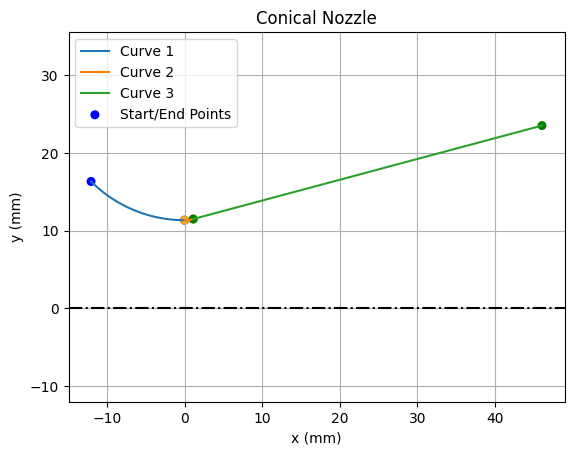



     Coordinate          Curve 1        Curve 2         Curve 3
0  Start (x, y)  (-12.03, 16.33)   (0.0, 11.34)   (1.12, 11.49)
1    End (x, y)     (0.0, 11.34)  (1.12, 11.49)  (46.03, 23.52)


In [ ]:
conical_xy_1, conical_xy_2, conical_xy_3 = conical_nozzle(initial_params)

## BELL NOZZLE CONTOUR

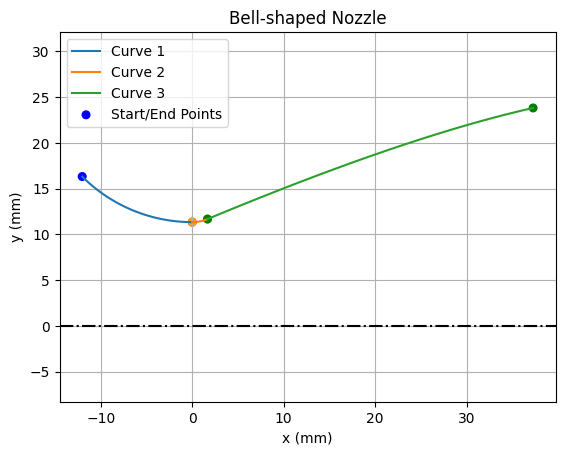



     Coordinate          Curve 1        Curve 2         Curve 3
0  Start (x, y)  (-12.03, 16.33)   (0.0, 11.34)   (1.67, 11.68)
1    End (x, y)     (0.0, 11.34)  (1.67, 11.68)  (37.26, 23.83)


In [ ]:
bell_xy_1, bell_xy_2, bell_xy_3 = bell_nozzle(initial_params)

## SPIKE NOZZLE CONTOUR

<ipython-input-97-b69f46cbc892>:69: RuntimeWarning:

invalid value encountered in double_scalars



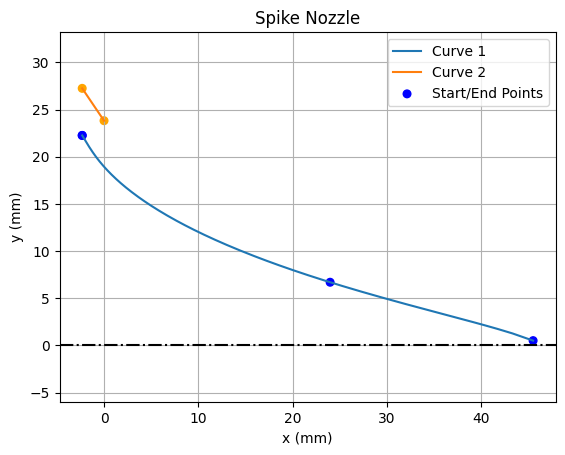



     Coordinate         Curve 1 Curve 1 (50% length)         Curve 2
0  Start (x, y)  (-2.31, 22.26)       (-2.31, 22.26)  (-2.31, 27.25)
1    End (x, y)   (45.47, 0.52)         (23.96, 6.7)    (0.0, 23.83)


In [ ]:
spike_xy_1, spike_xy_2 = spike_nozzle(initial_params, spike_detail)

## SAVING NOZZLE CONTOUR COORDINATES

Saving Nozzle Contour Coordinates in an Excel Sheet

In [ ]:
pip install XlsxWriter

In [ ]:
excel_writer = pd.ExcelWriter('Rocket_Nozzle_Contour_Coordinates.xlsx', engine='xlsxwriter')


# Conical Nozzle

conical_xy_1.to_excel(excel_writer, sheet_name='CONICAL', index=False, startrow=1, startcol=0)
worksheet = excel_writer.sheets['CONICAL']
worksheet.write('A1', 'Curve 1')  # Writing the title in cell A1

conical_xy_2.to_excel(excel_writer, sheet_name='CONICAL', index=False, startrow=1, startcol=len(conical_xy_1.columns)+1)
worksheet = excel_writer.sheets['CONICAL']
worksheet.write('D1', 'Curve 2')

conical_xy_3.to_excel(excel_writer, sheet_name='CONICAL', index=False, startrow=1, startcol=len(conical_xy_1.columns)+len(conical_xy_2.columns)+2)
worksheet = excel_writer.sheets['CONICAL']
worksheet.write('G1', 'Curve 3 (Divergent)')

#


# Bell Nozzle

bell_xy_1.to_excel(excel_writer, sheet_name='BELL', index=False, startrow=1, startcol=0)
worksheet = excel_writer.sheets['BELL']
worksheet.write('A1', 'Curve 1')  # Writing the title in cell A1

bell_xy_2.to_excel(excel_writer, sheet_name='BELL', index=False, startrow=1, startcol=len(bell_xy_1.columns)+1)
worksheet = excel_writer.sheets['BELL']
worksheet.write('D1', 'Curve 2')

bell_xy_3.to_excel(excel_writer, sheet_name='BELL', index=False, startrow=1, startcol=len(bell_xy_1.columns)+len(bell_xy_2.columns)+2)
worksheet = excel_writer.sheets['BELL']
worksheet.write('G1', 'Curve 3 (Divergent)')

#


# Spike Nozzle

spike_xy_1.to_excel(excel_writer, sheet_name='SPIKE', index=False, startrow=1, startcol=0)
worksheet = excel_writer.sheets['SPIKE']
worksheet.write('A1', 'Curve 1')  # Writing the title in cell A1

spike_xy_2.to_excel(excel_writer, sheet_name='SPIKE', index=False, startrow=1, startcol=len(spike_xy_1.columns)+1)
worksheet = excel_writer.sheets['SPIKE']
worksheet.write('D1', 'Curve 2')

#

excel_writer.save()

<ipython-input-102-09fca2439fe0>:50: FutureWarning:

save is not part of the public API, usage can give unexpected results and will be removed in a future version



# FULL CEA NASA OUTPUT

In [ ]:
dadosCEA = ispObj.get_full_cea_output( Pc=P_1*1e-5, MR=OF, eps=initial_params['eps'], PcOvPe=P_1/P_3, frozen=1, frozenAtThroat=1, pc_units='bar')
print(dadosCEA)


 *******************************************************************************

         NASA-GLENN CHEMICAL EQUILIBRIUM PROGRAM CEA, OCTOBER 18, 2002
                   BY  BONNIE MCBRIDE AND SANFORD GORDON
      REFS: NASA RP-1311, PART I, 1994 AND NASA RP-1311, PART II, 1996

 *******************************************************************************



 reac
  fuel C20H42(S)  C 20.0   H 42.0    wt%=100.00
  h,cal=-142242.1     t(k)=298.15   rho=788.6
  oxid NitrousOxide  N 2.0 O 1.0  wt%=100.00
  h,cal= 19467.0 t(k)=298.15
  
 prob case=RocketCEA,
  rocket frozen nfz=2    p,bar=30.000000,  pi/p=29.607698,  supar=4.410926,
  o/f=7.600000,
  
  
 output calories  transport
 end

 OPTIONS: TP=F  HP=F  SP=F  TV=F  UV=F  SV=F  DETN=F  SHOCK=F  REFL=F  INCD=F
 RKT=T  FROZ=T  EQL=F  IONS=F  SIUNIT=F  DEBUGF=F  SHKDBG=F  DETDBG=F  TRNSPT=T

 TRACE= 0.00E+00  S/R= 0.000000E+00  H/R= 0.000000E+00  U/R= 0.000000E+00

 Pc,BAR =    30.000000

 Pc/P =    29.6077

 SUBSONIC AREA RATIOS =


# REFERENCES



1.   Sutton, G.P. and Biblarz, O. (2001). Rocket Propulsion Elements. A Wiley Interscience publication. Wiley. ISBN: 9780471326427. [Online] Available at: < https://books.google.com.br/books?id=LQbDOxg3XZcC >.
2.   Rao, G.V.R. (1958). Exhaust Nozzle Contour for Optimum Thrust. Journal of Jet Propulsion, 28(6), 377-382. DOI: < https://doi.org/10.2514/8.7324 >.
3.   Newlands, R. (2017, April 18). The Thrust Optimized Parabolic Nozzle < http://www.aspirespace.org.uk/downloads/Thrust%20optimised%20parabolic%20nozzle.pdf >
4.   Design of Thrust Chambers and Other Combustion Devices. In: Modern Engineering for Design of Liquid-Propellant Rocket Engines. (pp. 67-134). DOI: 10.2514/5.9781600866197.0067.0134. Available at: https://arc.aiaa.org/doi/abs/10.2514/5.9781600866197.0067.0134.
5.   Samantra, A.K., Santhosh, K.S., Rashid, K., & Jayashree, A. (2020, August). Study of expansion ratio on dual bell nozzle of LOX-RP1 engine for replacing the existing bell nozzle to dual bell nozzle. IOP Conference Series: Materials Science and Engineering, 912(4), 042039. DOI: < https://dx.doi.org/10.1088/1757-899X/912/4/042039 >. IOP Publishing.
6.   Vernacchia, M. (2013). Spike Contour Algorithm: Pyralis Rocket Engine. MIT Rocket Team. < https://www.bing.com/ck/a?!&&p=7434b40129859d8aJmltdHM9MTcwNjE0MDgwMCZpZ3VpZD0zMDFkNjRiZi02NjI0LTZhM2ItMDRkZi03NjFmNjdlYTZiMmMmaW5zaWQ9NTE4NA&ptn=3&ver=2&hsh=3&fclid=301d64bf-6624-6a3b-04df-761f67ea6b2c&psq=Vernacchia%2c+M.+(2013).+Spike+Contour+Algorithm%3a+Pyralis+Rocket+Engine.+MIT+Rocket+Team.+Date+Started%3a+December+13%2c+2013.+Date+Modified%3a+December+16%2c+2013.&u=a1aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL212ZXJuYWNjL2Flcm9zcGlrZS1ub3p6bGUtZGVzaWduLWd1aS9tYXN0ZXIvU3Bpa2UlMjBDb250b3VyJTIwQWxnb3JpdGhtLnBkZg&ntb=1 > Date Started: December 13, 2013. Date Modified: December 16, 2013.
7.   Besnard, E., Chen, H.H., Mueller, T., & Garvey, J. (2002). Design, Manufacturing and Test of a Plug Nozzle Rocket Engine. In 38th AIAA/ASME/SAE/ASEE Joint Propulsion Conference & Exhibit. DOI: 10.2514/6.2002-4038. < https://arc.aiaa.org/doi/abs/10.2514/6.2002-4038 >.
8.  Haif, S., Kbab, H., & Benkhedda, A. (2022). "Design and Numerical Analysis of a Plug Nozzle." Advances in Military Technology, 17(1), 17-32. ISSN 1802-2308, eISSN 2533-4123. DOI: < https://doi.org/10.3849/aimt.01523 >
9.  Zebbiche, T. (2005). "Supersonic Plug Nozzle Design." In 41st AIAA/ASME/SAE/ASEE Joint Propulsion Conference & Exhibit. DOI: < https://doi.org/10.2514/6.2005-4490 >.


